# Trabalho de Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [2]:
import sys
import random
import matplotlib.pyplot as plt
import numpy as np

import time
import random

sys.path.append("algoritmos/")

In [3]:
def heapify(unsorted, index, heap_size):
    largest = index
    
    left_index = 2 * index + 1
    
    right_index = 2 * index + 2
    
    #verifies that the left is greater than the index and the element of the left is greater
    #than the highest index, if yes the maximum index receives the index of the left.
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:
        largest = left_index

    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index

        
    if largest != index:
        # if there was exchange the index receives the largest and the largest receives the indece
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]
        # calls the function with the new index that will be the largest, will scroll to the last element
        heapify(unsorted, largest, heap_size)


def heap_sort(unsorted):
    
    n = len(unsorted)
    
    for i in range(n // 2 - 1, -1, -1): # invert vector and subtract 1 from mod, so start the from pivo
        heapify(unsorted, i, n)
        
    for i in range(n - 1, 0, -1): # inverts and reads every vector minus the first element and the last element
        
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0] # exchange last element for the first
        heapify(unsorted, 0, i) # resets the first element with greater
    return unsorted

if __name__ == '__main__':
    
    try:
        raw_input          # Python 2
    except NameError:
        raw_input = input  # Python 3
        
    #unsorted = np.random.randint(100, size = 100)  #Generate 100 elements

## Questão 1

In [3]:
print('e ai')

e ai


## Questão 2

## A) Use uma sequência aleatória de números inteiros entre 1 e 100 como entrada do algoritmo e apresente o print da execução.

In [14]:
tamanho = random.randint(1, 100)
unsorted = np.random.randint(tamanho, size = tamanho)  #Generate 100 elements
print('vetor não ordenado\n', unsorted)
print('vetor ordenado \n', heap_sort(unsorted))

vetor não ordenado
 [43 72 13 49 60 11 20  6 70 38 30 42 65 63 26 72 68 10 72 66 15 16  9 20
 16 58 66  6 51  2 11 43  6  4  4 37 62 29  0 23 54 49 57 63 47 59 12  6
 26 60 57 54 15 50 30  7 57 13 57 72 53 42 18 36 62 72 20 15  2 35 38 26
 14 32 34  0 14]
vetor ordenado 
 [ 0  0  2  2  4  4  6  6  6  6  7  9 10 11 11 12 13 13 14 14 15 15 15 16
 16 18 20 20 20 23 26 26 26 29 30 30 32 34 35 36 37 38 38 42 42 43 43 47
 49 49 50 51 53 54 54 57 57 57 57 58 59 60 60 62 62 63 63 65 66 66 68 70
 72 72 72 72 72]


## B) Qual é a complexidade no tempo do algoritmo? Explique.

O algoritmo heapSprt tem por sua complexidade no melhor caso n*log(n) e para o pior caso n*log(n), porém deve constar que a quantidade de trocas realizadas influenciam na eficiência do algoritmo, sendo assim um vetor em decrescente possuiria um desempenho relacionado a tempo relativamento melhor que um vetor em ordem crescenta, sendo estes dados como entrada para a ordenação.

## C) 
### c1) Compare o tempo de execução do algoritmo quando o mesmo recebe como entrada sequências ordenadas (em ordem crescente e decrescente) e desordenadas. 
### c2) Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

A ordenção ocorrei para o caso (C1) com 100 elementos, para o caso (C2) ocorre com valores de 50,100,1.000, 10.000, 1.000.000, conforme fica evidenciado acima.


Sendo assim um vetor em ordem crescente possui mais etapas de trocas realizadas desta forma possui um tempo mais elevado que os vetor aleatórios ou decrescentes, os vetores descrescentes e aleatórios possuem tempo relativamento próximo, visto que um vetor decrescente precisa fazer menos iterações de troca e o vetor aleatório dependendo da situação dos elementos do vetor pode-se obter quase a mesma quatidade de iterações.

In [5]:
def tempo_execucao():
    
    tempo_crescente   = []
    tempo_decrescente = []
    tempo_desordenado = []
    
    for i in range(0,100):
        unsorted = np.random.randint(100, size = 100)  #Generate elements
        vetor = heap_sort(unsorted) # Ordenacao

        # Vetor ordenado 
        inicio = time.time()
        crescente = heap_sort(vetor)
        fim = time.time()
        t1 = fim - inicio
        tempo_crescente.append(t1)

        # Vetor Decrecente
        inicio = time.time()
        decrescente = heap_sort(vetor[::-1])
        fim = time.time()
        t2 = fim - inicio
        tempo_decrescente.append(t2)

        #Vetor Desordenado
        inicio = time.time()
        desordenado = heap_sort(unsorted)
        fim = time.time()
        t3 = fim - inicio
        tempo_desordenado.append(t3)
        
    return tempo_crescente, tempo_decrescente, tempo_desordenado

In [6]:
def tamanho_crescente():
    tempo_crescente   = []
    tempo_decrescente = []
    tempo_desordenado = []
    
    parcial_crescente   = []
    parcial_decrescente = []
    parcial_desordenado = []
    
    tamanho = [50, 100, 1000, 10000, 100000, 1000000] 
    for i in range(0,5):
        for j in range(0,5):
            unsorted = np.random.randint(tamanho[i], size = tamanho[i])  #Generate elements
            vetor = heap_sort(unsorted) # Ordenacao
            
            # Vetor ordenado 
            inicio = time.time()
            crescente = heap_sort(vetor)
            fim = time.time()
            t1 = fim - inicio
            parcial_crescente.append(t1)

            # Vetor Decrecente
            inicio = time.time()
            decrescente = heap_sort(vetor[::-1])
            fim = time.time()
            t2 = fim - inicio
            parcial_decrescente.append(t2)

            #Vetor Desordenado
            inicio = time.time()
            desordenado = heap_sort(unsorted)
            fim = time.time()
            t3 = fim - inicio
            parcial_desordenado.append(t3)
            
            print('ta rodando')
        tempo_crescente.append(sum(parcial_crescente)/tamanho[i])
        tempo_decrescente.append(sum(parcial_decrescente)/tamanho[i])
        tempo_desordenado.append(sum(parcial_desordenado)/tamanho[i])
        
    return tempo_crescente, tempo_decrescente, tempo_desordenado

In [13]:
def plotagem_tempo(tempo_crescente, tempo_decrescente, tempo_desordenado):
    plt.plot(tempo_crescente,   'r', label='Vetor Crescente')
    plt.plot(tempo_decrescente, 'g', label='Vetor Decrescente')
    plt.plot(tempo_desordenado, 'b', label='Vetor Desordenado')
    plt.legend()
    plt.title("Tamanho fixo de elementos")
    plt.show()

In [10]:
def tamanho_variado(tempo_crescente, tempo_decrescente, tempo_desordenado):
    plt.plot(tempo_crescente, 'r')
    plt.plot(tempo_decrescente, 'g')
    plt.plot(tempo_desordenado, 'b')
    plt.legend(('Vetor Crescente', 'Vetor Decrescente', 'Vetor Desordenado'), loc = 'upper center', shadow=True)
    plt.title('Tamanho variado de elementos')
    plt.show()

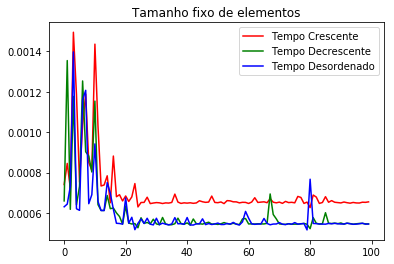

ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando
ta rodando


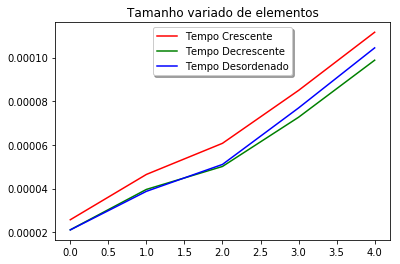

In [12]:
tempo_crescente, tempo_decrescente, tempo_desordenado = tempo_execucao()
plotagem_tempo(tempo_crescente, tempo_decrescente, tempo_desordenado)

tempo_crescente, tempo_decrescente, tempo_desordenado = tamanho_crescente()
tamanho_variado(tempo_crescente, tempo_decrescente, tempo_desordenado)

A ordenção ocorrei para o caso (C1) com 100 elementos, para o caso (C2) ocorre com valores de 50,100,1.000, 10.000, 1.000.000, conforme fica evidenciado acima.

C1)
    Sendo assim para um vetor em ordem crescente possui mais etapas de trocas realizadas desta forma possui um tempo mais elevado que os vetor aleatórios ou decrescentes, os vetores descrescentes e aleatórios possuem tempo relativamento próximo, visto que um vetor decrescente precisa fazer menos iterações de troca e o vetor aleatório dependendo da situação dos elementos do vetor pode-se obter quase a mesma quatidade de iterações.
    
C2) Para o segundo caso, como foi constatado o vetor em ordem crescente à ser ordenado será mais oneroso que vetores decrescente e desordenado, porém para valores pequenos os vetores decrescente e aleatório possuem tempo próximos, porém para valores assintóticos o vetor aleatório possui melhor desenpenho, visto que ha possibilidade de fazer menos iterações que o vetor descrescente.

## D)  Faça um estudo comparativo do algoritmo HeapSort com os algoritmos QuickSort, implementados na Questão 1, nas situações apresentadas.

## Questão 3

In [ ]:
qual foi

## Questão 4

In [ ]:
fala